<IPython.core.display.Javascript object>


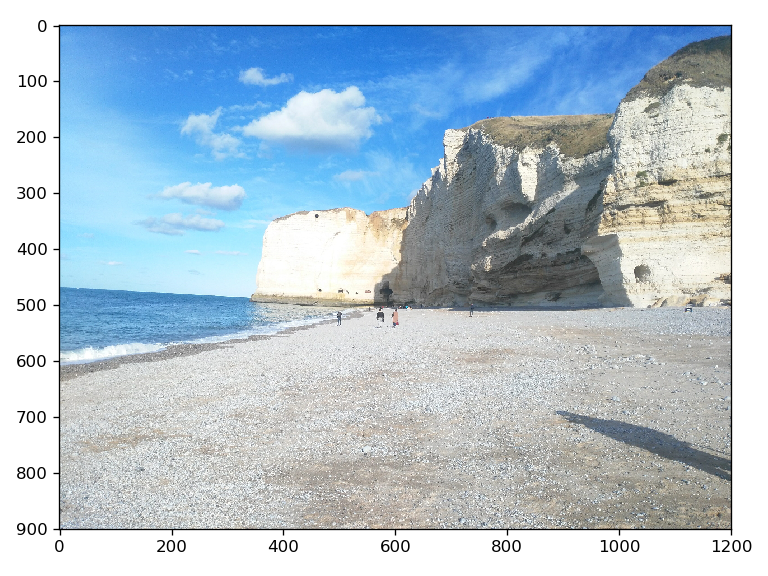

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
from skimage.io import imread,imshow
from skimage.color import rgb2hsv

im = imread('etretat.jpg')
hsv = rgb2hsv(im)

plt.figure()
imshow(im)
plt.show()

<IPython.core.display.Javascript object>


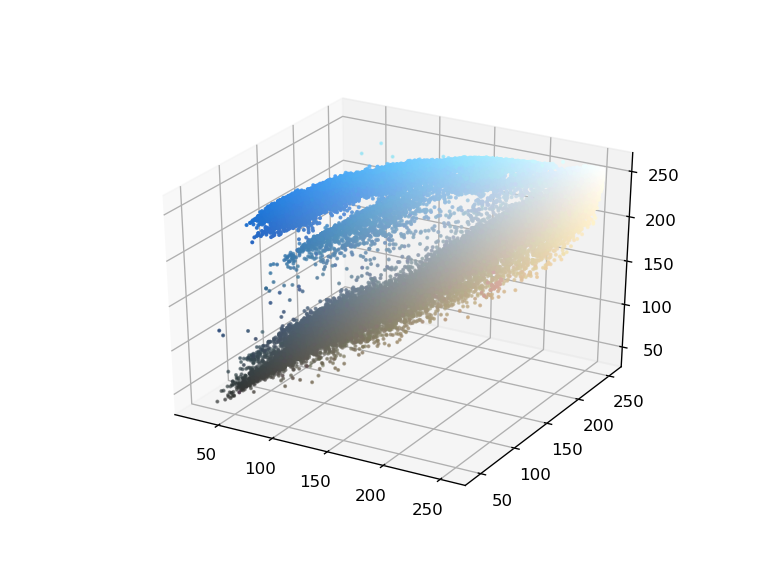

<IPython.core.display.Javascript object>


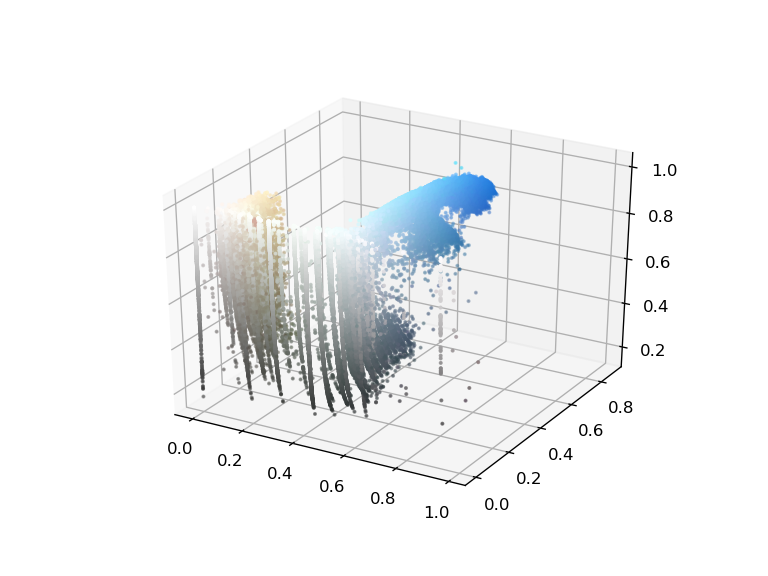

In [4]:
from mpl_toolkits.mplot3d import Axes3D

def scatter_3d(coords, colors):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(coords[:,0], coords[:,1], coords[:,2], s=2, c=colors)
    plt.show()
    
pixels = im.reshape((im.shape[0]*im.shape[1],3))[::20,:]
scatter_3d(pixels, pixels/255)

pixelshsv = hsv.reshape((im.shape[0]*im.shape[1],3))[::20,:]
scatter_3d(pixelshsv, pixels/255)

In [19]:
def distance_image_space(im, coords):
    dmap = np.zeros((im.shape[0], im.shape[1]))
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            dmap[i,j] = np.sqrt((i-coords[0])**2 + (j-coords[1])**2)
    
    return dmap

def distance_color_space(im, coords):
    refcolor = im[coords[0],coords[1]]
    dmap = np.sqrt(((im-refcolor)**2).sum(axis=2))
    #np.zeros((im.shape[0], im.shape[1]))
    #for i in range(im.shape[0]):
    #    for j in range(im.shape[1]):
    #        dmap[i,j] = np.sqrt(((im[i,j]-refcolor)**2).sum())
    
    return dmap

<IPython.core.display.Javascript object>


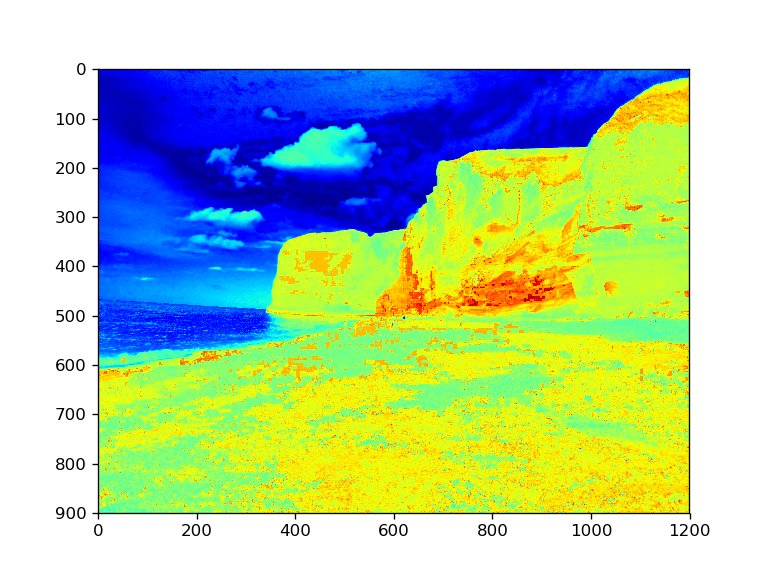

In [20]:
coords = (200,600)

dmap = distance_color_space(hsv.astype('float'), coords)

plt.figure()
plt.imshow(dmap, cmap=plt.cm.jet)
plt.show()

<IPython.core.display.Javascript object>


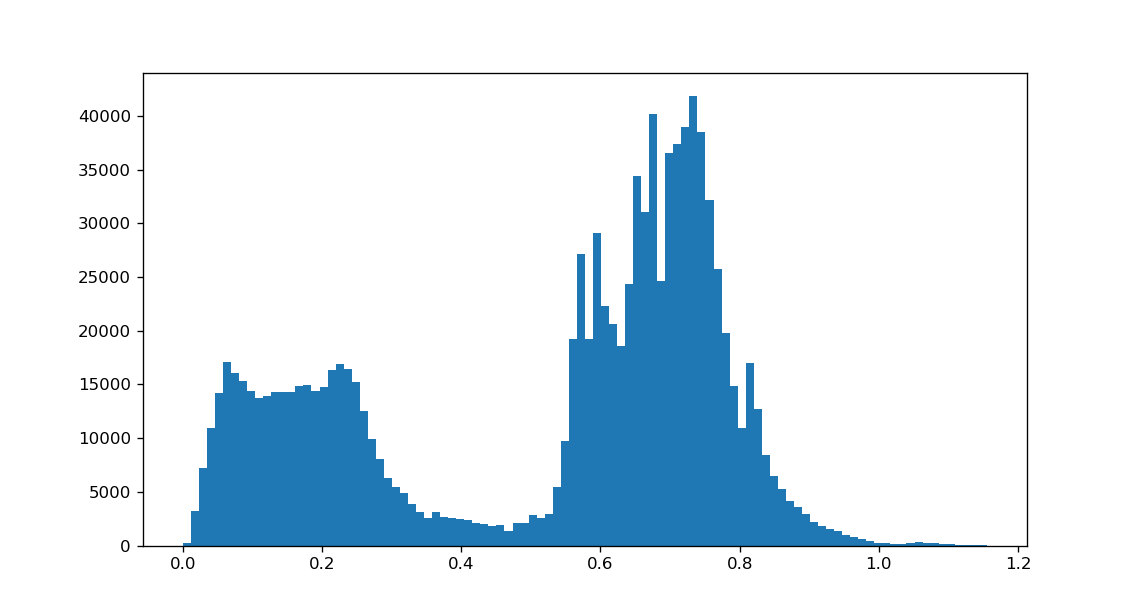

In [16]:
plt.figure()
plt.hist(dmap.flatten(), bins=100)
plt.show()

<IPython.core.display.Javascript object>


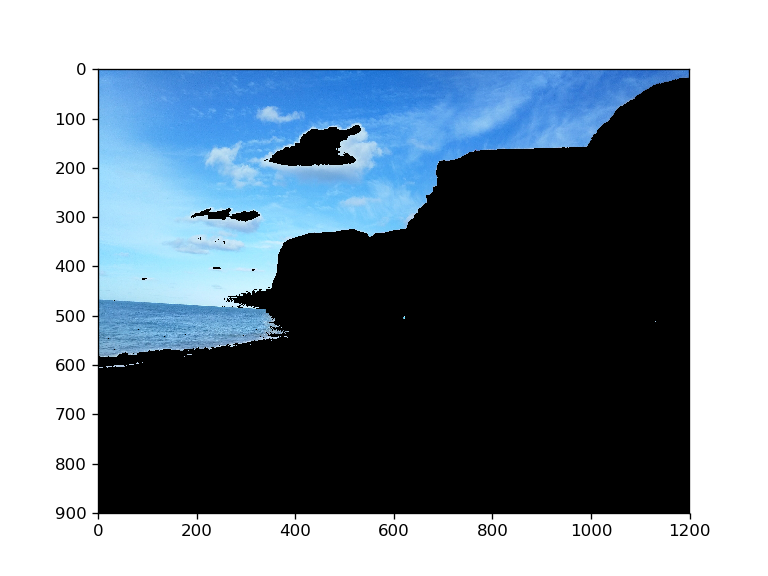

In [18]:
mask = (dmap<0.4)
im_m = im.copy()
im_m[mask==False] = 0

plt.figure()
plt.imshow(im_m)
plt.show()